<a href="https://colab.research.google.com/github/siyaboban/Sample/blob/main/ML_Model_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as crs_pd

In [ ]:
crs_data = crs_pd.read_csv("/content/drive/MyDrive/Datasets/cleaned_crs_data.csv")

In [ ]:
crs_data

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22


In [ ]:
crs_data.shape

(2200, 8)

In [ ]:
crs_data['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [ ]:
crs_Ip = crs_data.drop('crop_num',axis=1)
crs_Op = crs_data['crop_num']

In [ ]:
from sklearn.model_selection import train_test_split as crs_split

crs_Xtr, crs_Xts, crs_Ytr, crs_Yts = crs_split(crs_Ip, crs_Op, test_size=0.2, random_state= 30)
crs_Xva, crs_Xts, crs_Yva, crs_Yts = crs_split(crs_Xts, crs_Yts, test_size= 0.5, random_state= 30)

In [ ]:
print("\nTraining Shape    :", crs_Xtr.shape)
print("\nValidation Shape  :", crs_Xva.shape)
print("\nTesting Shape     :", crs_Xts.shape)


Training Shape    : (1760, 7)

Validation Shape  : (220, 7)

Testing Shape     : (220, 7)


In [ ]:
from sklearn.metrics import confusion_matrix as crs_confusM
from sklearn.metrics import ConfusionMatrixDisplay as crs_disp
from sklearn.metrics import classification_report as crs_rep
from sklearn import metrics as crs_Mt
import matplotlib.pyplot as crs_mpl
import time as crs_time
import numpy as crs_np
import warnings as crs_wgs
crs_wgs.filterwarnings("ignore")

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as crs_rf
from sklearn.model_selection import RandomizedSearchCV as crs_rsv

crs_prmtrs = {'n_estimators': [100, 20, 80, 40],
                   'criterion': ['gini', 'entropy', 'log_loss'],
                   'max_depth': [3, 7, 9, 12]}

# Initialize the RandomForestClassifier
crs_modl = crs_rf(random_state= 40)

# Initialize RandomizedSearchCV with the model and parameters
crs_rand_search = crs_rsv(crs_modl, crs_prmtrs, cv=2, verbose=10)

# Fit the RandomizedSearchCV object to the data
crs_rand_search.fit(crs_Xtr, crs_Ytr)

print("\nRandom Forest Parameters selected by Random Search :")
print(crs_rand_search.best_params_)
print("\nRandom Forest Score: ", crs_rand_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START criterion=entropy, max_depth=7, n_estimators=20............
[CV 1/2; 1/10] END criterion=entropy, max_depth=7, n_estimators=20;, score=0.993 total time=   0.1s
[CV 2/2; 1/10] START criterion=entropy, max_depth=7, n_estimators=20............
[CV 2/2; 1/10] END criterion=entropy, max_depth=7, n_estimators=20;, score=0.991 total time=   0.1s
[CV 1/2; 2/10] START criterion=gini, max_depth=12, n_estimators=100.............
[CV 1/2; 2/10] END criterion=gini, max_depth=12, n_estimators=100;, score=0.994 total time=   0.3s
[CV 2/2; 2/10] START criterion=gini, max_depth=12, n_estimators=100.............
[CV 2/2; 2/10] END criterion=gini, max_depth=12, n_estimators=100;, score=0.991 total time=   0.3s
[CV 1/2; 3/10] START criterion=gini, max_depth=12, n_estimators=80..............
[CV 1/2; 3/10] END criterion=gini, max_depth=12, n_estimators=80;, score=0.994 total time=   0.3s
[CV 2/2; 3/10] START criterion=gini, m

Training Process : 0.2030179500579834 Seconds

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00 

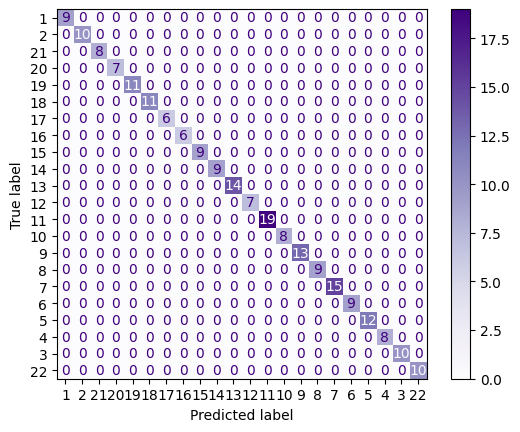

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_rf(**crs_rand_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

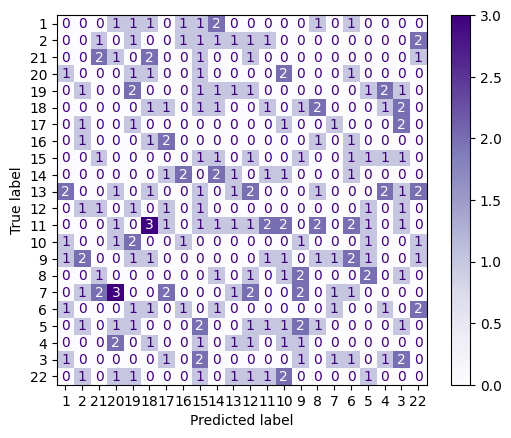

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as crs_dt

# Initialize the DecisionTreeClassifier
dt_model = crs_dt(random_state=40)

# Define the parameters for RandomizedSearchCV for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with the Decision Tree model and parameters
dt_random_search = crs_rsv(dt_model, dt_params, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
dt_random_search.fit(crs_Xtr, crs_Ytr)

print("\nDecision Tree Parameters selected by Randomized Search:")
print(dt_random_search.best_params_)
print("\nDecision Tree Score: ", dt_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Decision Tree Parameters selected by Randomized Search:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'entropy'}

Decision Tree Score:  0.9159090909090908


Training Process : 0.031836748123168945 Seconds

              precision    recall  f1-score   support

           1       0.64      1.00      0.78         9
           2       0.75      0.90      0.82        10
           3       1.00      0.38      0.55         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      0.85      0.92        13
          16       0.69      1.00      0.82         9
          17       1.00      1.0

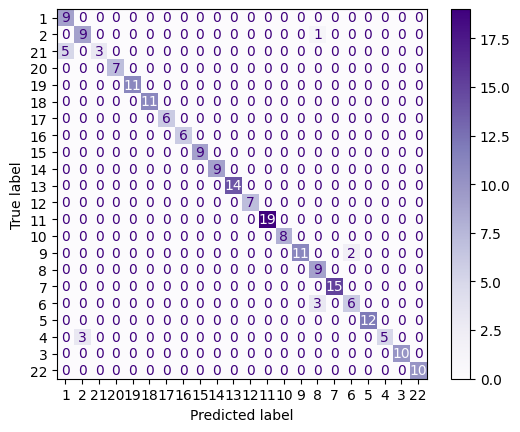

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_dt(**dt_random_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

              precision    recall  f1-score   support

           1       0.64      1.00      0.78         7
           2       0.75      1.00      0.86         9
           3       1.00      0.50      0.67         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       0.88      0.64      0.74        11
          16       0.90      1.00      0.95         9
          17       1.00      1.00      1.00         5
          18       0.69    

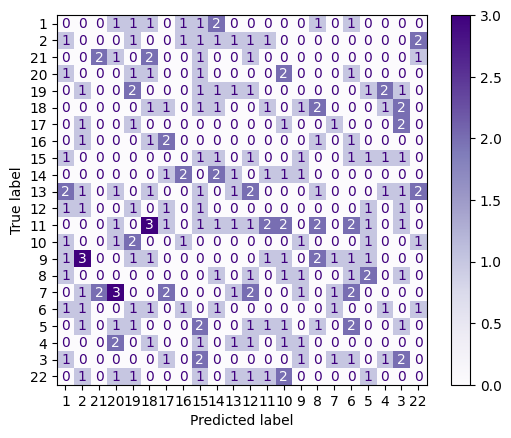

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC as crs_svc

# Initialize the SVM classifier
svm_model = crs_svc(random_state=40)

# Define the parameters for GridSearchCV for SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with the SVM model and parameters
svm_grid_search = crs_rsv(svm_model, svm_params, cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
svm_grid_search.fit(crs_Xtr, crs_Ytr)

print("\nSVM Parameters selected by Random Search:")
print(svm_grid_search.best_params_)
print("\nSVM Score: ", svm_grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

SVM Parameters selected by Random Search:
{'kernel': 'linear', 'gamma': 'scale', 'C': 10}

SVM Score:  0.984659090909091


Training Process : 0.09841775894165039 Seconds

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00

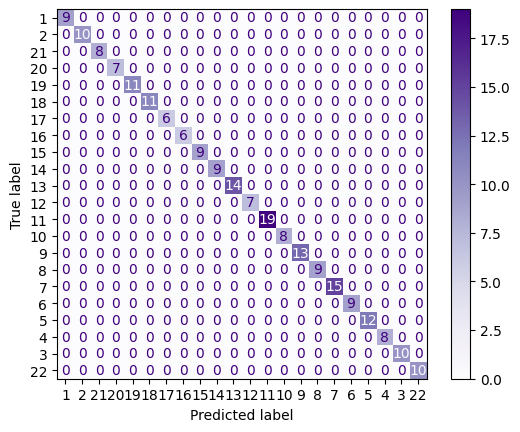

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_svc(**svm_grid_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         9
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

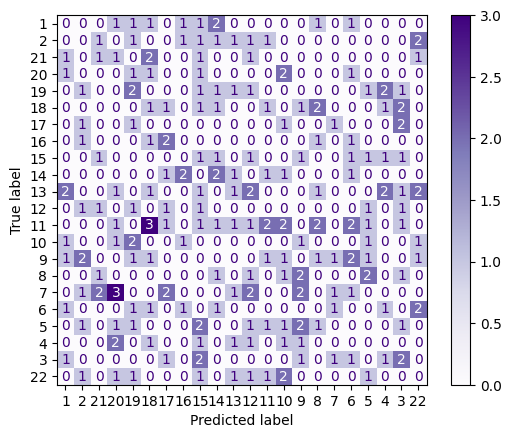

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

**KNN Implementation**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as crs_knn

# Initialize the KNN classifier
knn_model = crs_knn()

# Define the parameters for RandomizedSearchCV for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV with the KNN model and parameters
knn_random_search = crs_rsv(knn_model, knn_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
knn_random_search.fit(crs_Xtr, crs_Ytr)

print("\nKNN Parameters selected by Randomized Search:")
print(knn_random_search.best_params_)
print("\nKNN Score: ", knn_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

KNN Parameters selected by Randomized Search:
{'weights': 'distance', 'p': 1, 'n_neighbors': 3}

KNN Score:  0.9829545454545453


Training Process : 0.00428462028503418 Seconds

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.90      0.95        10
           3       0.89      1.00      0.94         8
           4       0.88      1.00      0.93         7
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00         9
          17       1.00      1.00

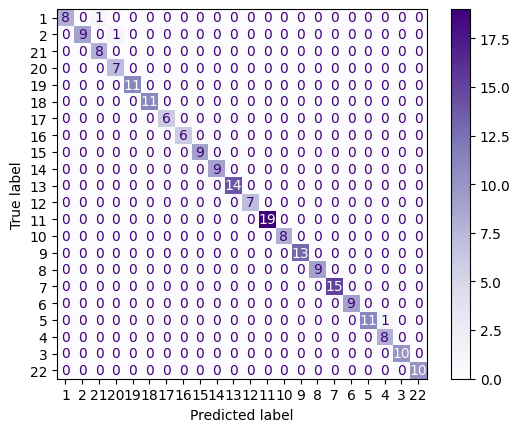

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_knn(**knn_random_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

              precision    recall  f1-score   support

           1       0.75      0.86      0.80         7
           2       1.00      1.00      1.00         9
           3       0.86      0.75      0.80         8
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00        12
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00         9
          17       1.00      1.00      1.00         5
          18       1.00    

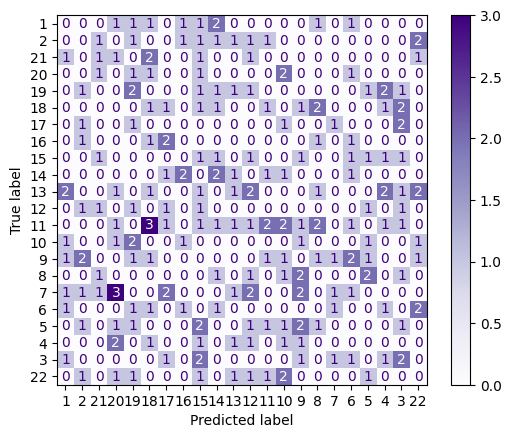

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

crop_labels = crs_data['crop_num'].unique()

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

**Boosting Algorithms**

**XGBoost Implementation**

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as crs_xgb

In [ ]:
# Define the parameters for RandomizedSearchCV
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Assuming crs_Ytr is a pandas Series, adjust labels to start from 0
crs_Ytr = crs_Ytr - 1

# Remove instances with class 22 if they are not relevant
crs_Ytr = crs_Ytr[crs_Ytr != 21] # 21 is the new label for class 22 after adjustment

# Re-index the data after removing instances
crs_Xtr = crs_Xtr.loc[crs_Ytr.index]

# Initialize the XGBoost classifier
crs_xgb_model = crs_xgb.XGBClassifier(random_state=40, use_label_encoder=False, eval_metric='logloss')

# Initialize RandomizedSearchCV with the model and parameters
# n_iter controls the number of random combinations to try
xgb_random_search = crs_rsv(crs_xgb_model, xgb_params, n_iter=10, cv=2, verbose=10, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
xgb_random_search.fit(crs_Xtr, crs_Ytr)

print("\nXGBoost Parameters selected by Randomized Search:")
print(xgb_random_search.best_params_)
print("\nXGBoost Score: ", xgb_random_search.best_score_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits

XGBoost Parameters selected by Randomized Search:
{'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}

XGBoost Score:  0.9892779102105682


Training Process : 1.8517022132873535 Seconds

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       9.0
           2       0.00      0.00      0.00      10.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00       7.0
           5       0.00      0.00      0.00      11.0
           6       0.00      0.00      0.00      11.0
           7       0.00      0.00      0.00       6.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00       9.0
          10       0.00      0.00      0.00       9.0
          11       0.00      0.00      0.00      14.0
          12       0.00      0.00      0.00       7.0
          13       0.00      0.00      0.00      19.0
          14       0.00      0.00      0.00       8.0
          15       0.00      0.00      0.00      13.0
          16       0.00      0.00 

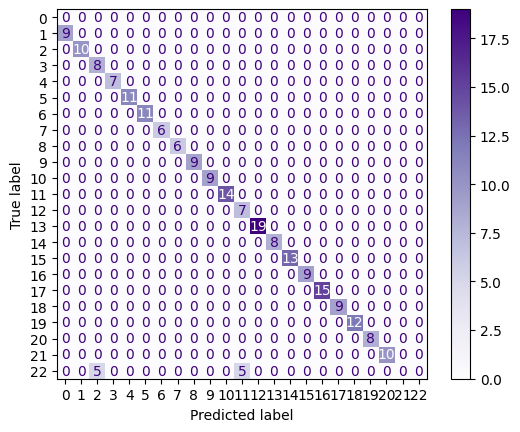

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_xgb.XGBClassifier(**xgb_random_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(crs_y_pdct)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yva)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_mpl.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

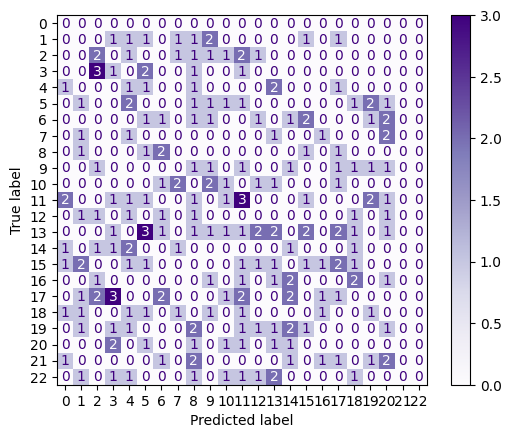

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as crs_lgb

# Initialize the LightGBM classifier
lgb_model = crs_lgb.LGBMClassifier(random_state=40)

# Define the parameters for RandomizedSearchCV for LightGBM
lgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'num_leaves': [31, 63],
    'boosting_type': ['gbdt', 'dart'],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize RandomizedSearchCV with the LightGBM model and parameters
lgb_random_search = crs_rsv(lgb_model, lgb_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
lgb_random_search.fit(crs_Xtr, crs_Ytr)

print("\nLightGBM Parameters selected by Randomized Search:")
print(lgb_random_search.best_params_)
print("\nLightGBM Score: ", lgb_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[Lig

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 7
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -2.995137
[LightGBM] [Info] Start training from score -3.031505
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -3.095220
[LightGBM] [Info] Start training from score -2.983302
[LightGBM] [Info] Start training from score -2.948617
[LightGBM] [Info] Start training from score -3.108466
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.069245
[LightGBM] [Info] Start training from score -3.043927
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] 

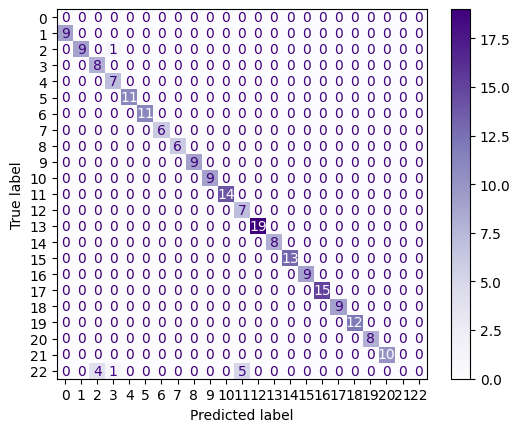

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_lgb.LGBMClassifier(**lgb_random_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(crs_y_pdct)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yva)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_mpl.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

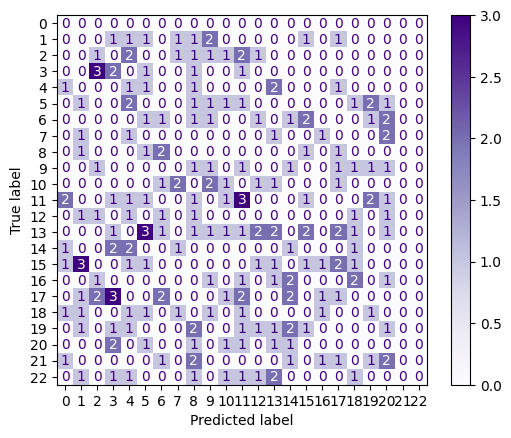

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier as crs_cat

# Initialize the CatBoost classifier
catboost_model = crs_cat(random_state=40, verbose=0)  # Suppress verbose output during training

# Define the parameters for RandomizedSearchCV for CatBoost
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.05],
    'depth': [3, 5],
    'l2_leaf_reg': [1, 3]
}

# Initialize RandomizedSearchCV with the CatBoost model and parameters
catboost_random_search = crs_rsv(catboost_model, catboost_params, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
catboost_random_search.fit(crs_Xtr, crs_Ytr)

print("\nCatBoost Parameters selected by Randomized Search:")
print(catboost_random_search.best_params_)
print("\nCatBoost Score: ", catboost_random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

CatBoost Parameters selected by Randomized Search:
{'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 3}

CatBoost Score:  0.9928518123667377


0:	learn: 2.8363326	total: 6.41ms	remaining: 1.28s
1:	learn: 2.6420603	total: 11.8ms	remaining: 1.16s
2:	learn: 2.4921504	total: 16.5ms	remaining: 1.08s
3:	learn: 2.3454367	total: 22.6ms	remaining: 1.11s
4:	learn: 2.2573671	total: 27.3ms	remaining: 1.06s
5:	learn: 2.1404420	total: 32.1ms	remaining: 1.04s
6:	learn: 2.0505432	total: 37.2ms	remaining: 1.02s
7:	learn: 1.9451618	total: 42.2ms	remaining: 1.01s
8:	learn: 1.8649054	total: 47.2ms	remaining: 1s
9:	learn: 1.8181254	total: 51.8ms	remaining: 985ms
10:	learn: 1.7538761	total: 56.6ms	remaining: 973ms
11:	learn: 1.6780564	total: 61.7ms	remaining: 966ms
12:	learn: 1.6039326	total: 66.4ms	remaining: 955ms
13:	learn: 1.5372333	total: 71.1ms	remaining: 945ms
14:	learn: 1.4829676	total: 76.3ms	remaining: 941ms
15:	learn: 1.4438492	total: 81.2ms	remaining: 934ms
16:	learn: 1.4004968	total: 85.9ms	remaining: 925ms
17:	learn: 1.3515871	total: 90.7ms	remaining: 917ms
18:	learn: 1.2908991	total: 95.6ms	remaining: 910ms
19:	learn: 1.2389902	tota

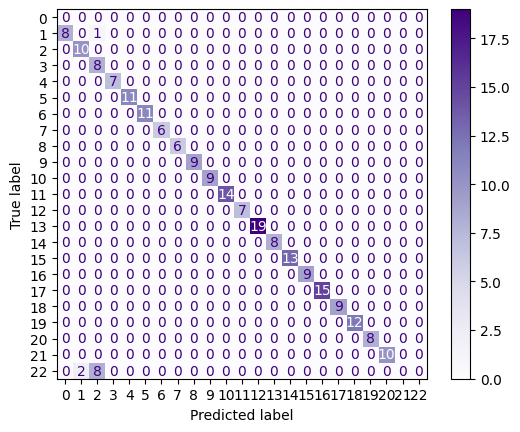

In [ ]:
### Training Process
crs_time1 = crs_time.time()
crs_modl = crs_cat(**catboost_random_search.best_params_)
crs_modl.fit(crs_Xtr, crs_Ytr)
crs_time2 = crs_time.time()
print("Training Process :", crs_time2-crs_time1, "Seconds\n")

### Validation process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xva)
print(crs_rep(crs_Yva, crs_y_pdct))
crs_time2 = crs_time.time()
print("Validation Process :", crs_time2-crs_time1, "Seconds\n")

# Get all unique predicted labels
predicted_labels = crs_np.unique(crs_y_pdct)

# Get all unique actual labels (assuming crs_Yva contains all possible labels)
actual_labels = crs_np.unique(crs_Yva)

# Combine unique predicted and actual labels
all_labels = crs_np.unique(crs_np.concatenate((predicted_labels, actual_labels)))

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = all_labels).plot(cmap = 'Purples') # Use all_labels here
crs_mpl.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       7.0
           2       0.00      0.00      0.00       9.0
           3       0.00      0.00      0.00       8.0
           4       0.00      0.00      0.00      12.0
           5       0.00      0.00      0.00      13.0
           6       0.00      0.00      0.00      13.0
           7       0.00      0.00      0.00       9.0
           8       0.00      0.00      0.00       6.0
           9       0.00      0.00      0.00      16.0
          10       0.00      0.00      0.00      11.0
          11       0.00      0.00      0.00       8.0
          12       0.00      0.00      0.00      13.0
          13       0.00      0.00      0.00       8.0
          14       0.00      0.00      0.00      12.0
          15       0.00      0.00      0.00      11.0
          16       0.00      0.00      0.00       9.0
          17       0.00    

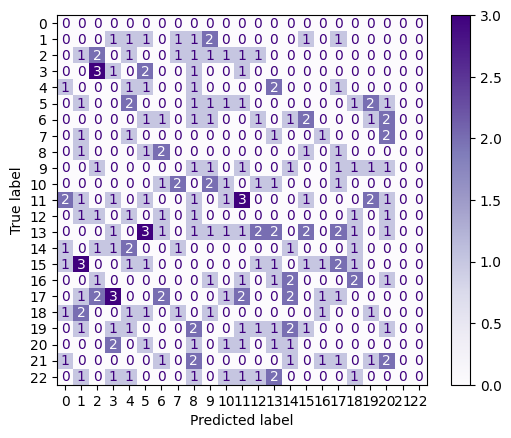

In [ ]:
### Testing Process
crs_time1 = crs_time.time()
crs_y_pdct = crs_modl.predict(crs_Xts)
print(crs_rep(crs_Yts, crs_y_pdct))
crs_time2 = crs_time.time()
print("Testing Process :", crs_time2-crs_time1, "Seconds\n")

# Ensure crop_labels includes all represented classes in the confusion matrix
crop_labels = crs_np.arange(crs_confM.shape[0])  # Generate labels for all classes

crs_confM = crs_confusM(crs_Yva, crs_y_pdct)
crs_disp(confusion_matrix = crs_confM, display_labels = crop_labels).plot(cmap = 'Purples')
crs_mpl.show()